In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import numpy as np
import pandas as pd

In [3]:
movies = pd.read_csv("P4-Movie-Ratings.csv")
movies.columns = ["Film","Genre",'CriticRating', 'AudienceRating',
       'BudgetMillion', 'Year']

In [4]:
movies.Film = pd.Categorical(movies.Film)
movies.Genre = pd.Categorical(movies.Genre)
movies.Year = pd.Categorical(movies.Year)

In [48]:
movies.head()
# movies.describe()

,Film,Genre,CriticRating,AudienceRating,BudgetMillion,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


### Audience Rating vs Critic Rating

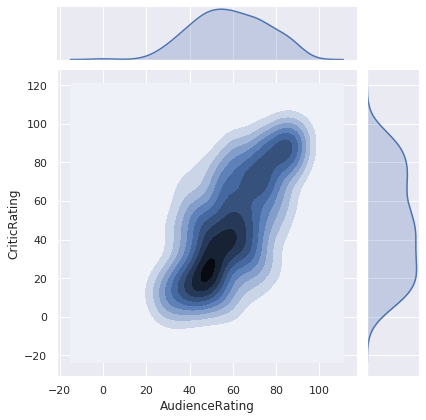

In [14]:
sns.jointplot(x=movies.AudienceRating, y=movies.CriticRating, kind="kde")

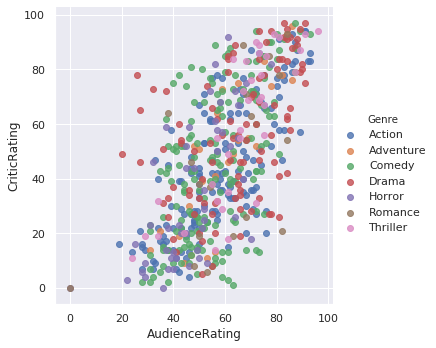

In [21]:
sns.lmplot(data=movies, x="AudienceRating", y="CriticRating", fit_reg=False, hue="Genre")

#sns.distplot() is univariate plot for a single variable distributions

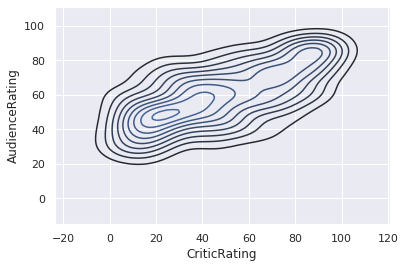

In [31]:
sns.kdeplot(movies.CriticRating, movies.AudienceRating)

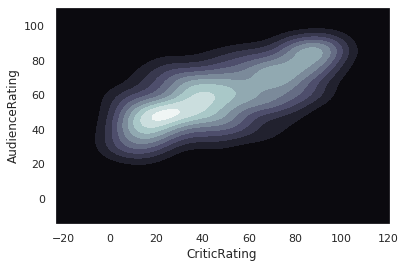

In [69]:
sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True ,cmap="bone")
# PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr,
# YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r,
# binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, 
# cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, 
# gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r,
# gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, 
# gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r,
# magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, 
# plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer,
# summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, 
# twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

---

# SUBPLOTS 

---

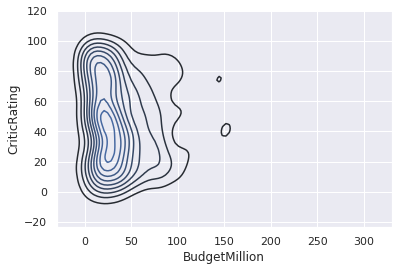

In [47]:
sns.kdeplot(movies.BudgetMillion, movies.CriticRating,  shade_lowest=True)
#Read as critics rating skews mostly around 0-50 million budget, and drops after that 

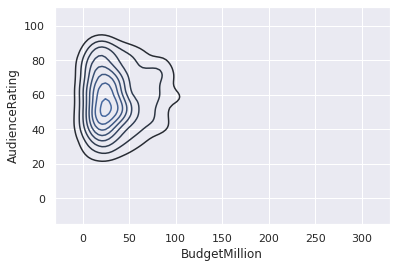

In [48]:
sns.kdeplot(movies.BudgetMillion, movies.AudienceRating,  shade_lowest=True)
#Read as Audience rating is genrally normally distributed around 0-50 million budget, and drops after that 

### Subplots takes row, Columns and generate that many sub graphs

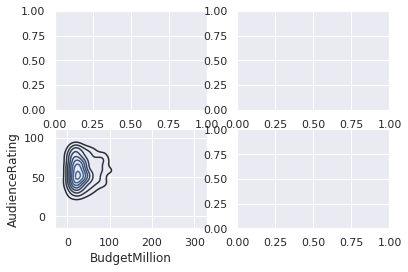

In [68]:
f, axes = plt.subplots(2,2)

#F is the figure Object 

# AXes is axis object of the graph , can be n dimensional array

sns.kdeplot(movies.BudgetMillion, movies.AudienceRating,  shade_lowest=True, ax=axes[1][0])


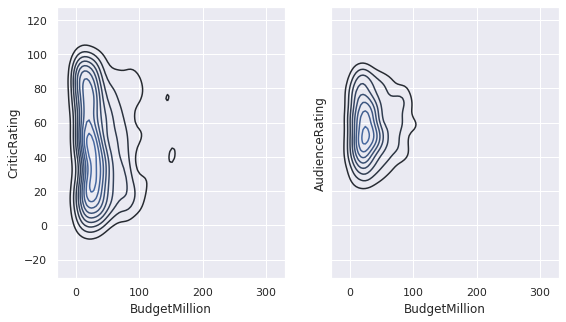

In [72]:
f, axes = plt.subplots(1,2, figsize=(9,5), sharex=True, sharey=True)

sns.kdeplot(movies.BudgetMillion, movies.CriticRating,  shade_lowest=True, ax=axes[0] )

sns.kdeplot(movies.BudgetMillion, movies.AudienceRating,  shade_lowest=True, ax=axes[1])

### Violin Plot

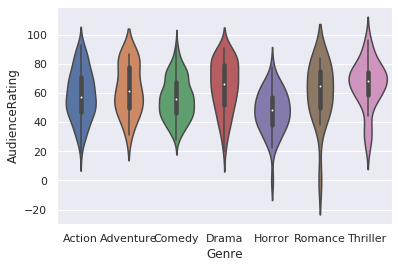

In [74]:
sns.violinplot(x=movies.Genre, y=movies.AudienceRating)

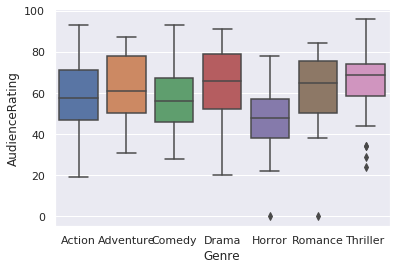

In [46]:
sns.boxplot(x=movies.Genre, y= movies.AudienceRating)

---

## Facet Grid



### Seperating it by Genre using Facet Grid

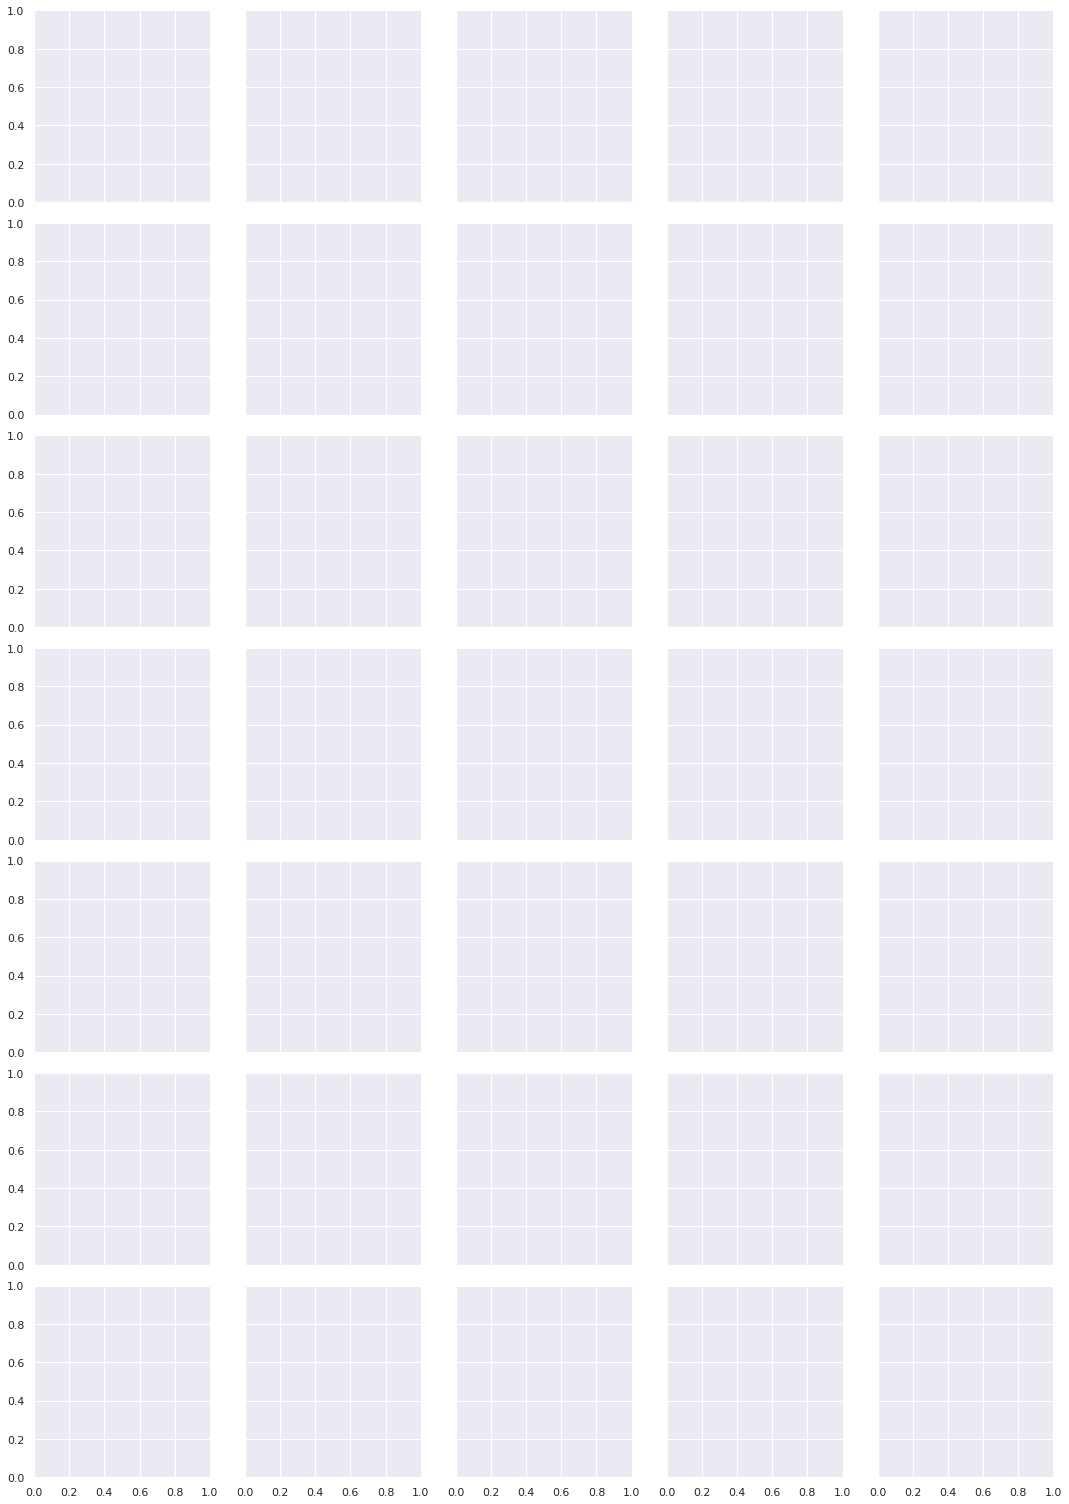

In [10]:
grid = sns.FacetGrid(data=movies, row="Genre", col="Year", hue="Genre" )

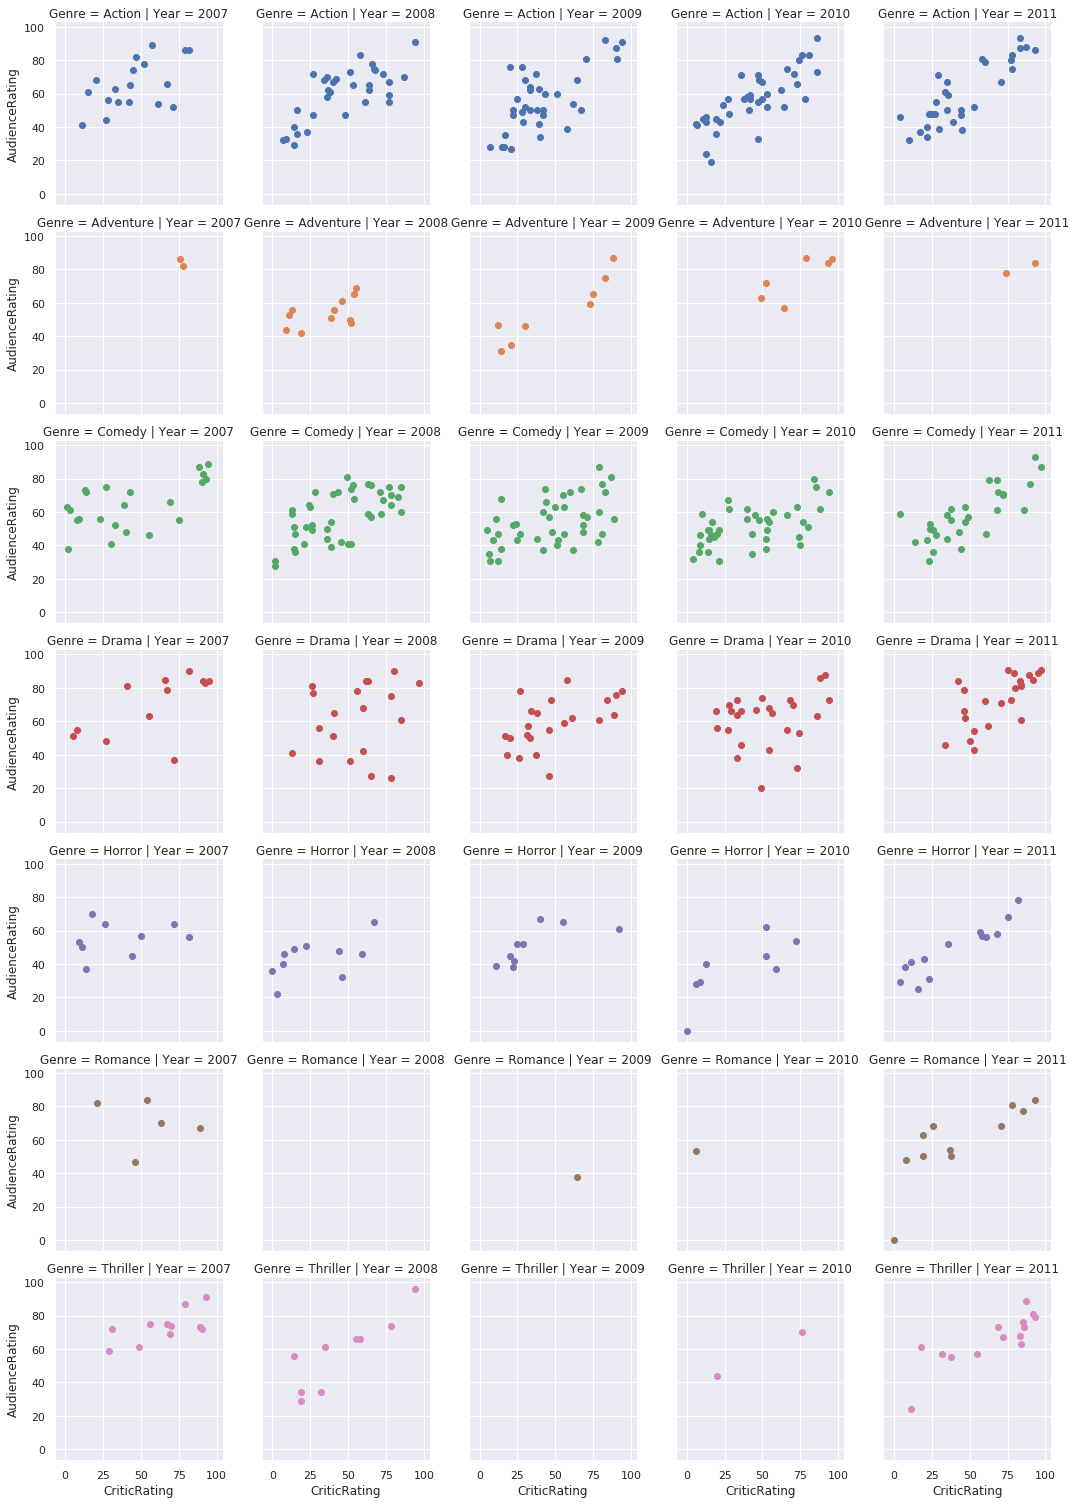

In [13]:
grid = sns.FacetGrid(data=movies, row="Genre", col="Year", hue="Genre" )
grid.map(plt.scatter,'CriticRating','AudienceRating' )

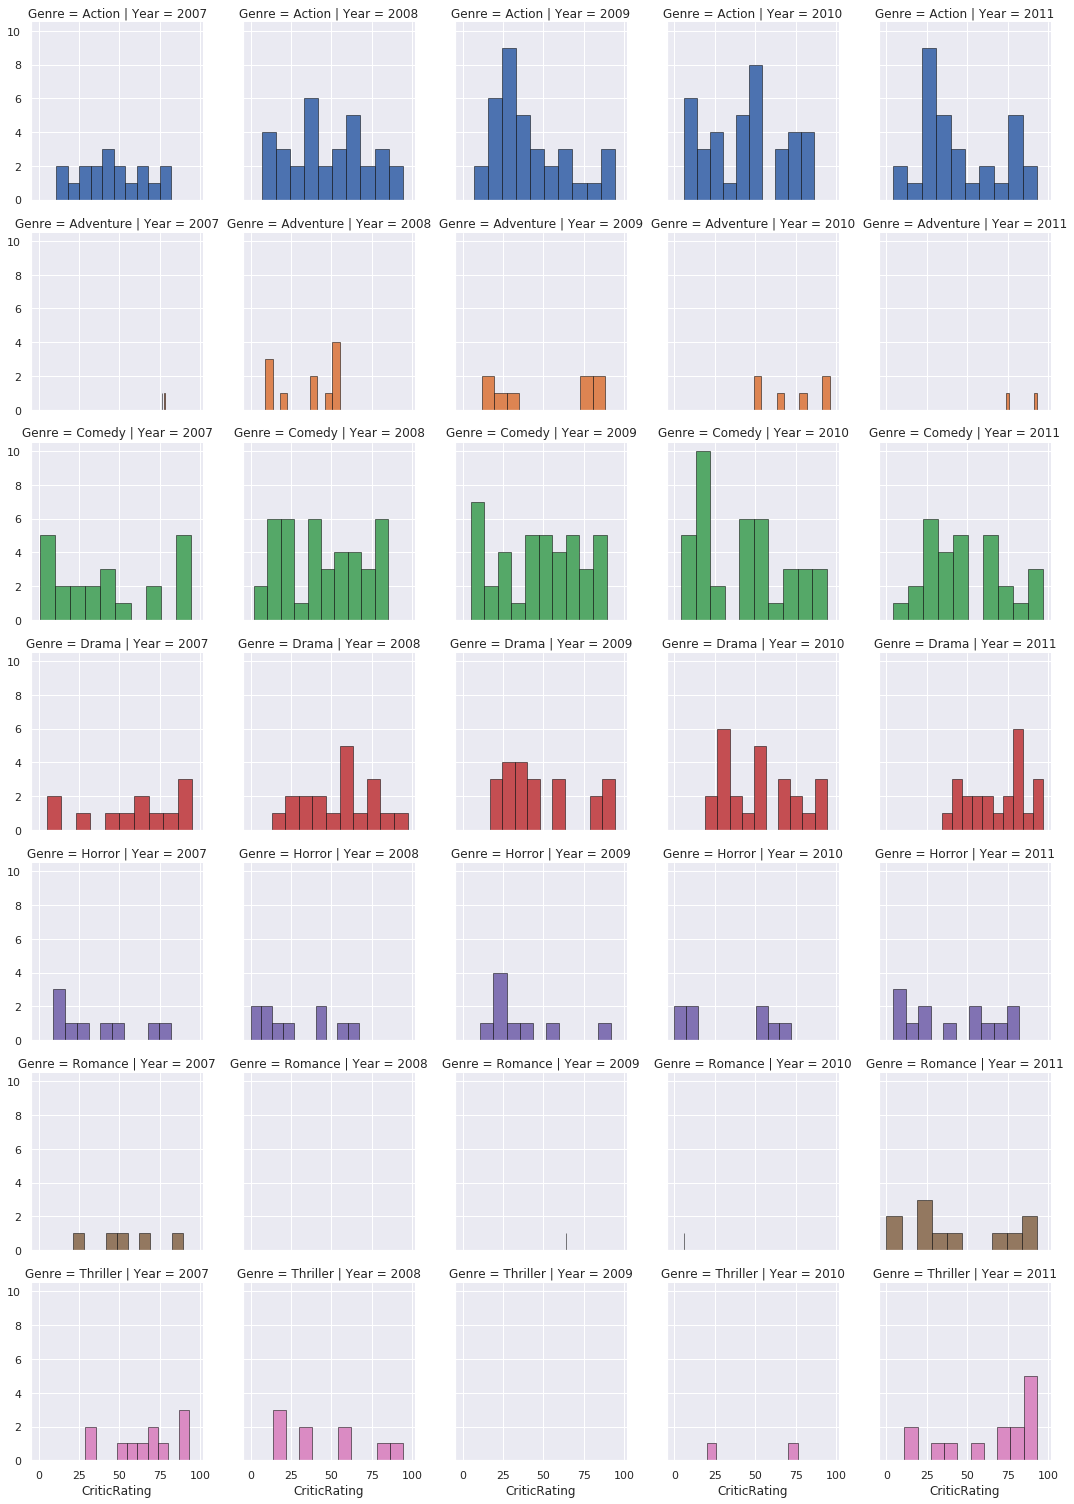

In [39]:
# pass that KWS here
grid2 = sns.FacetGrid(data=movies, row="Genre", col="Year", hue="Genre" )
kws = dict( linewidth=.5, edgecolor="black")
grid2.map(plt.hist,'CriticRating', **kws )

## Adding diagonal in the center

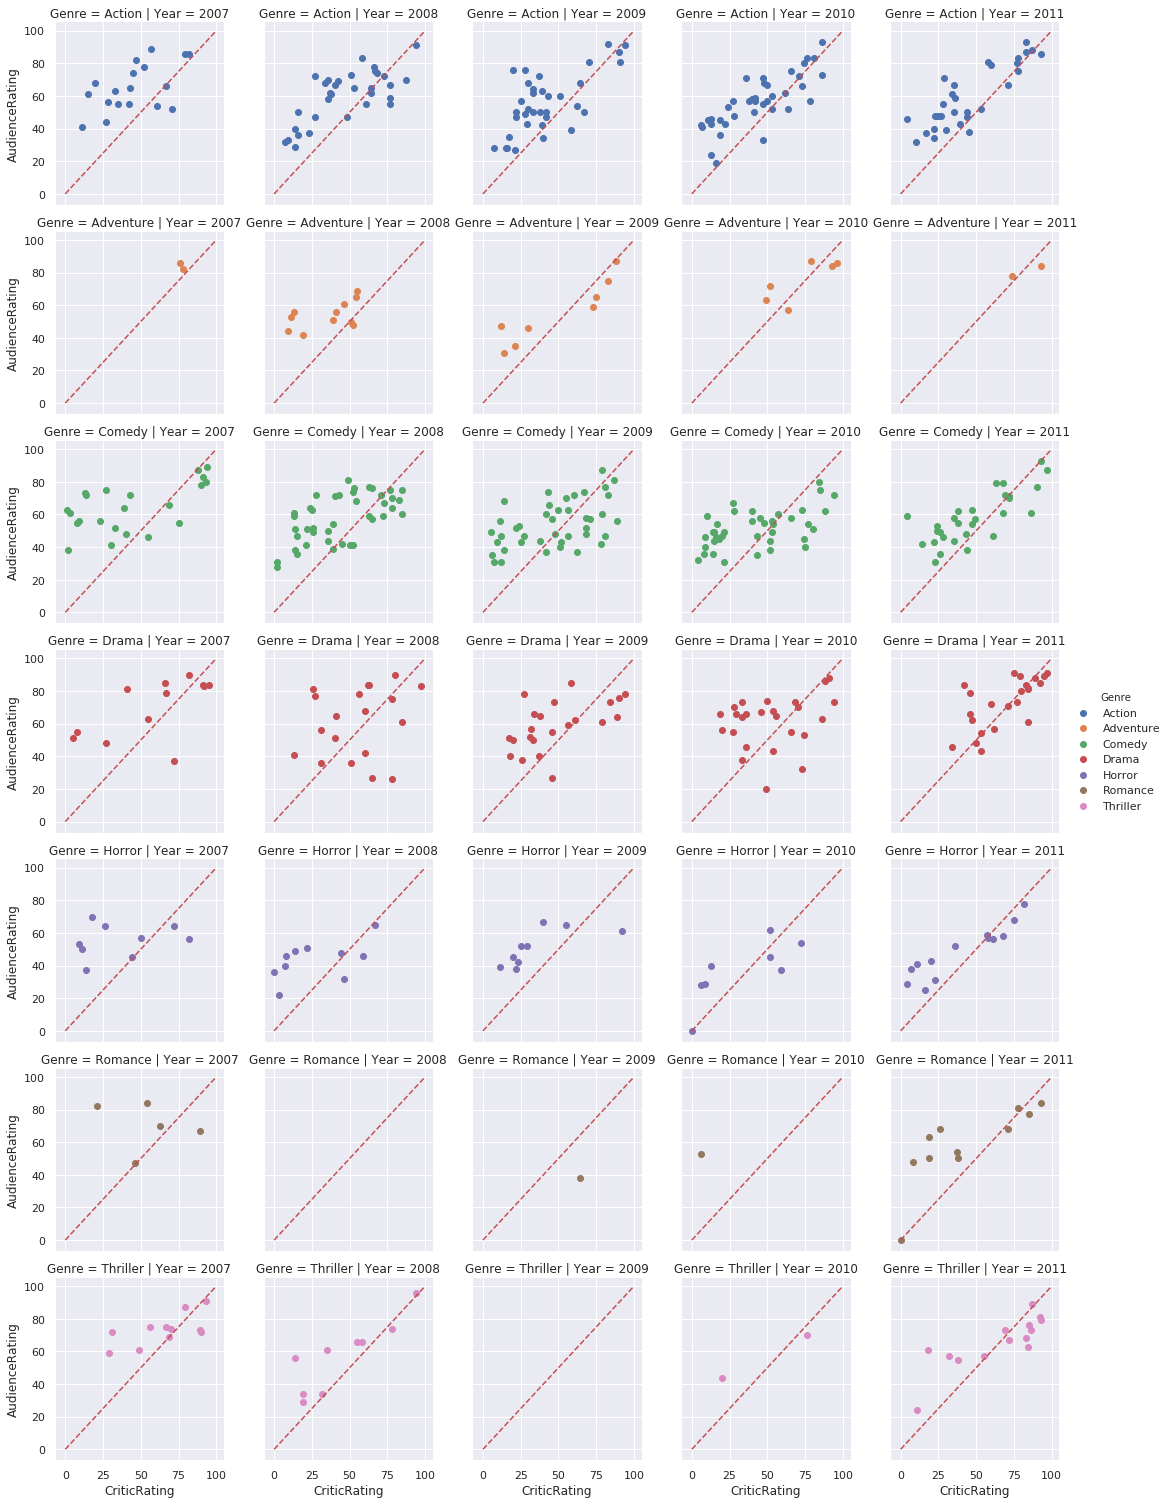

In [44]:
grid = sns.FacetGrid(data=movies, row="Genre", col="Year", hue="Genre" )
grid.map(plt.scatter,'CriticRating','AudienceRating')
for ax in grid.axes.flat:                            #grid.axes is the small grids, flat flattens 2D to 1 D list
    ax.plot((0,100),(0,100), c="r", ls="--")
grid.add_legend()